# Терентьев В.О. ИУ5-25М РК1

## Вариант 14

### Задача 14

Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "квадратный корень"

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [2]:
iris = load_iris()
data = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                    columns = iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


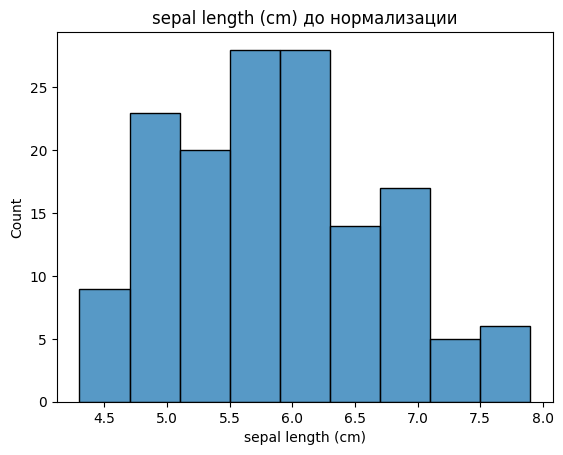

In [3]:
feature = 'sepal length (cm)'

sns.histplot(data[feature])
plt.title(f'{feature} до нормализации')
plt.show()

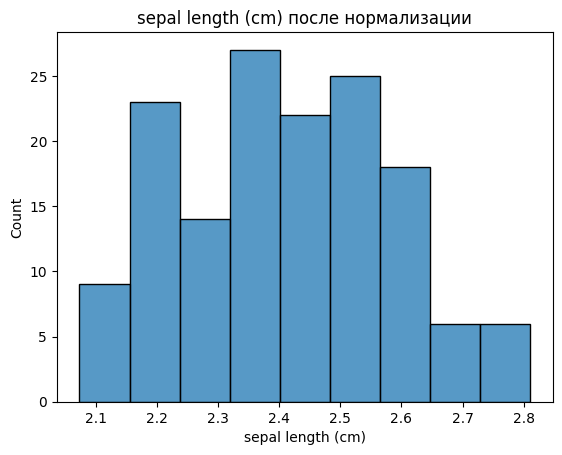

In [4]:
data[feature] = np.sqrt(data[feature])

sns.histplot(data[feature])
plt.title(f'{feature} после нормализации')
plt.show()

### Задача 34

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод вложений (embedded method). Используйте подход на основе линейной или логистической регрессии (в зависимости от того, на решение какой задачи ориентирован выбранный Вами набор данных - задачи регрессии или задачи классификации)

In [5]:
# загрузка датасета
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# создаем модель логистической регрессии с максимальным количеством итераций 1000
logreg = LogisticRegression(max_iter=1000)

# создаем селектор с использованием модели логистической регрессии
sfm = SelectFromModel(logreg)

# обучаем селектор
sfm.fit(X, y)

# получаем булеву маску отобранных признаков
feature_idx = sfm.get_support()

# получаем имена признаков
feature_names = np.array(diabetes.feature_names)[np.where(feature_idx)]
print(feature_names)

['sex' 'bmi' 'bp' 's3' 's4' 's5']


### Дополнительные требования по группам

Для произвольной колонки данных построить парные диаграммы (pairplot)

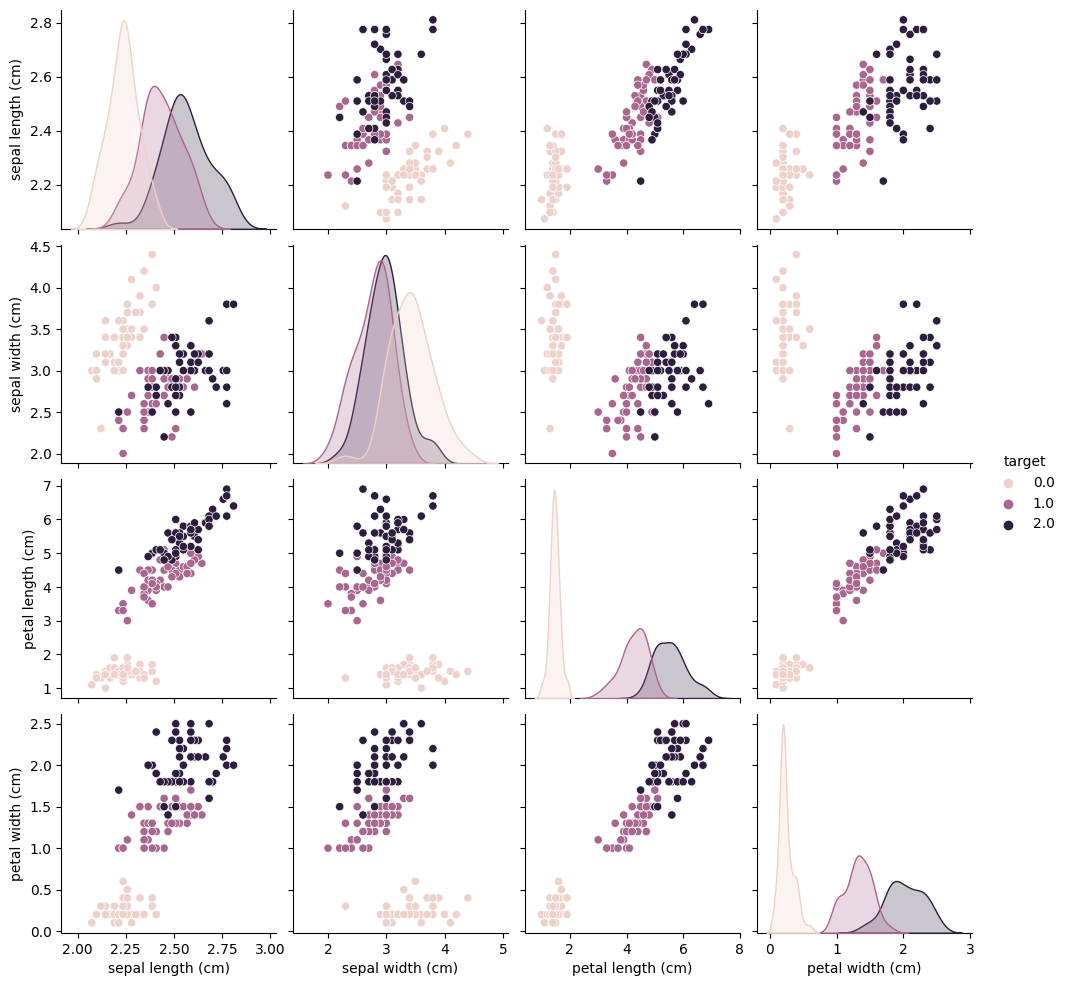

In [6]:
sns.pairplot(data, hue='target')